# **GOOGLE STOCK PRICE PREDICTION USING TIME SERIES**

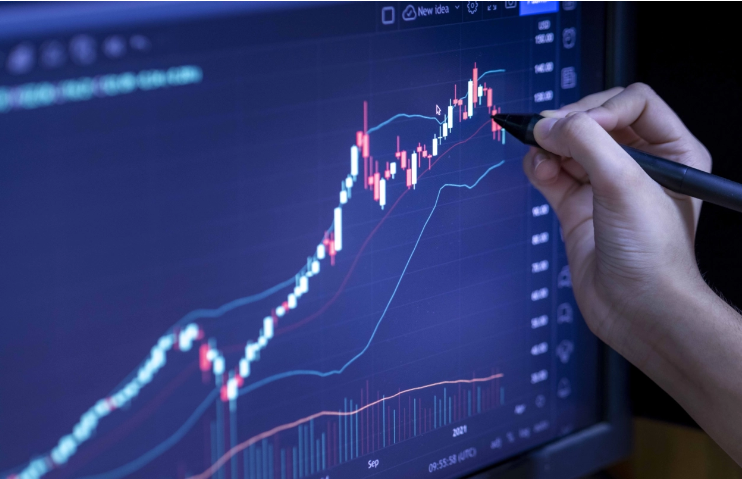

Stock price prediction is akin to weather forecasting for finance, where algorithms attempt to predict the unpredictable. Despite sophisticated models and vast data, the stock market's capricious nature often renders predictions as precarious as walking a tightrope in a tempest. Investors tread this terrain with hope, while skeptics argue that if stock prices could truly be predicted, we'd all be sipping cocktails on golden beaches.

1. Importing necessary libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2. Reading the dataset

In [188]:
data=pd.read_csv("/content/Google_Stock_Train (2010-2022).csv")
data.head()

Date       Open       High        Low      Close  Adj Close  \
0  2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   
1  2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365   
2  2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722   
3  2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367   
4  2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566   

      Volume  
0   78169752  
1  120067812  
2  158988852  
3  256315428  
4  188783028

In [189]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [190]:
data.shape

(3272, 7)

3. Checking for null values

In [191]:
data.isnull().any().sum()

0

4. Statistical Analysis

In [192]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     49.161187    49.650301    48.653316    49.160898    49.160898   
std      35.810449    36.216443    35.387644    35.804094    35.804094   
min      10.968719    11.068068    10.851602    10.912663    10.912663   
25%      20.281718    20.426113    20.172359    20.295858    20.295858   
50%      38.527750    38.931249    38.224501    38.563002    38.563002   
75%      61.837625    62.265000    61.218125    61.738001    61.738001   
max     151.250000   151.546494   148.899002   149.838501   149.838501   

             Volume  
count  3.272000e+03  
mean   6.017541e+07  
std    4.957609e+07  
min    9.312000e+06  
25%    2.894200e+07  
50%    4.123200e+07  
75%    7.927251e+07  
max    5.923990e+08

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [194]:
data.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999871  0.999856  0.999695   0.999695 -0.472816
High       0.999871  1.000000  0.999822  0.999854   0.999854 -0.471273
Low        0.999856  0.999822  1.000000  0.999864   0.999864 -0.475476
Close      0.999695  0.999854  0.999864  1.000000   1.000000 -0.473755
Adj Close  0.999695  0.999854  0.999864  1.000000   1.000000 -0.473755
Volume    -0.472816 -0.471273 -0.475476 -0.473755  -0.473755  1.000000

5. Converting the data['Date'] column to date&time type

In [195]:
data['Date'].unique()

array(['2010-01-04', '2010-01-05', '2010-01-06', ..., '2022-12-28',
       '2022-12-29', '2022-12-30'], dtype=object)

In [196]:
data['Date'] = pd.to_datetime(data['Date'])

In [197]:
data['Date'].unique()

array(['2010-01-04T00:00:00.000000000', '2010-01-05T00:00:00.000000000',
       '2010-01-06T00:00:00.000000000', ...,
       '2022-12-28T00:00:00.000000000', '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [198]:
data.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   78169752
1 2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365  120067812
2 2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722  158988852
3 2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367  256315428
4 2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566  188783028

In [199]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open      Close
Date                           
January    46.512823  46.521802
February   47.686112  47.666805
March      47.621720  47.605117
April      47.331308  47.238073
May        46.649278  46.722121
June       47.622935  47.607603
July       49.248218  49.379259
August     51.278224  51.287114
September  50.743585  50.686429
October    50.295342  50.340434
November   52.180810  52.151546
December   52.535861  52.489793

6. Data Visualizatation

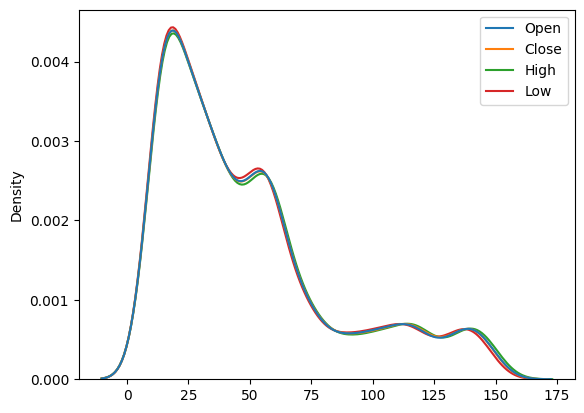

In [200]:
#plots for the columns
fig1=sns.kdeplot(data = data[['Open', 'Close','High', 'Low']])

In [201]:
# Line chart for Google stock price over time
import plotly.express as px
fig1 = px.line(data, x='Date', y='Close', title='Google Stock Price Over Time')
fig1.show()

In [202]:
#Scatter plot of daily trading volume
fig2 = px.scatter(data, x='Date', y='Volume', title='Daily Trading Volume')
fig2.show()

In [203]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

# **1. Technical Analysis:**
### Technical analysis is a method used in the stock market to predict future price movements based on historical data. Traders use charts to spot trends and patterns in prices.

Use technical indicators and chart patterns to analyze price
movements and identify potential buy/sell signals.

In [204]:
data.set_index('Date', inplace=True)

# Calculate Simple Moving Averages (SMA)
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Bollinger Bands
window = 20
data['SMA'] = data['Close'].rolling(window=window).mean()
data['STD'] = data['Close'].rolling(window=window).std()
data['Upper_Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower_Band'] = data['SMA'] - (data['STD'] * 2)

# Identify potential buy/sell signals
data['Buy_Signal'] = np.where((data['SMA20'] > data['SMA50']) & (data['RSI'] < 30) & (data['Close'] > data['Lower_Band']), 1, 0)
data['Sell_Signal'] = np.where((data['SMA20'] < data['SMA50']) & (data['RSI'] > 70) & (data['Close'] > data['Upper_Band']), -1, 0)

# Print the dataset with indicators and signals
print(data)


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   78169752   
2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365  120067812   
2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722  158988852   
2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367  256315428   
2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566  188783028   
...               ...        ...        ...        ...        ...        ...   
2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   23003000   
2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   20097300   
2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   19523200   
2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   23333500   
2022-12-30  86.980003  88.300003  86.570

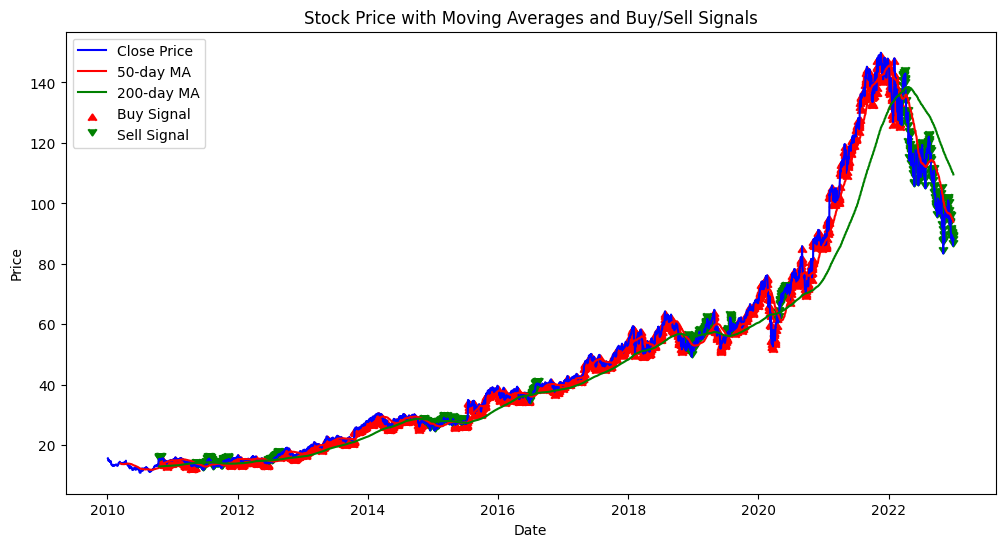

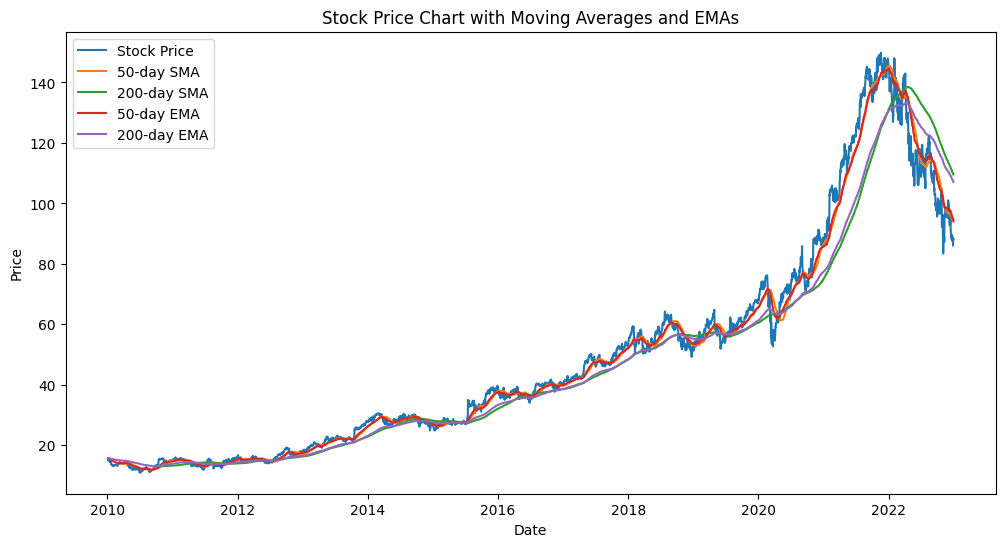

In [209]:
# Plot the stock price with moving averages and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

plt.plot(data.index, data['MA_50'], label='50-day MA', color='red')
plt.plot(data.index, data['MA_200'], label='200-day MA', color='green')

# Highlight buy and sell signals.
buy_signals = data[data['Signal'] == 'Buy']
sell_signals = data[data['Signal'] == 'Sell']
plt.scatter(buy_signals.index, buy_signals['Close'], marker=6, color='r', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker=7, color='g', label='Sell Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages and Buy/Sell Signals')
plt.legend()

# Calculate the 50-day EMA and 200-day EMA
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Plot the stock price chart with moving averages and EMAs
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.plot(data.index, data['MA_50'], label='50-day SMA')
plt.plot(data.index, data['MA_200'], label='200-day SMA')
plt.plot(data.index, data['EMA_50'], label='50-day EMA')
plt.plot(data.index, data['EMA_200'], label='200-day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Chart with Moving Averages and EMAs')
plt.legend()
plt.show()

**Code Details**

1. We load the dataset and convert the 'Date' column to datetime and set
it as the index.
2. We calculate the 20-day and 50-day Simple Moving Averages (SMA) for the 'Close' prices.
3. We define a function calculate_rsi() to manually compute the Relative Strength Index (RSI) using the standard formula.
4. We calculate the RSI for each data point.
5. We calculate the Bollinger Bands using a 20-day window, where we compute the SMA and standard deviation (STD) of closing prices.
6. We calculate the upper and lower Bollinger Bands by adding and subtracting twice the STD from the SMA.
7. We determine buy signals based on conditions such as the 20-day SMA crossing above the 50-day SMA, RSI below 30, and the closing price above the lower Bollinger Band.
8. We determine sell signals based on conditions such as the 20-day SMA crossing below the 50-day SMA, RSI above 70, and the closing price above the upper Bollinger Band.
9. The results, including calculated indicators and signals, are printed for analysis.

# **2. Trend Identification**
Determine the overall trend of the financial asset over
time (e.g., uptrend, downtrend, sideways).

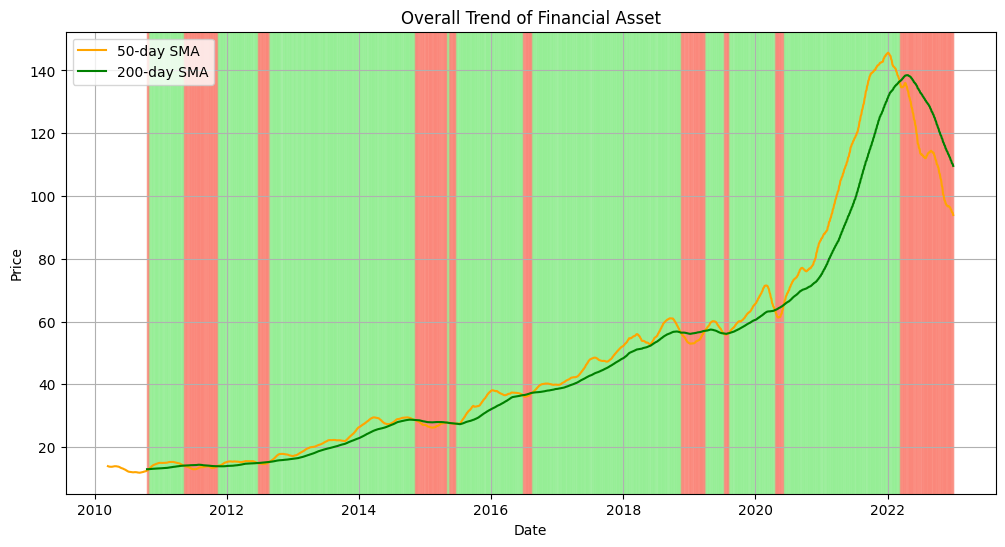

In [210]:
# Calculate Simple Moving Averages (SMA)
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Determine the overall trend
data['Trend'] = np.where(data['SMA50'] > data['SMA200'], 'Uptrend', np.where(data['SMA50'] < data['SMA200'], 'Downtrend', 'Sideways'))

# Plot the overall trend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SMA50'], label='50-day SMA', color='orange')
plt.plot(data.index, data['SMA200'], label='200-day SMA', color='green')

# Highlight uptrend and downtrend areas
for index, row in data.iterrows():
    if row['Trend'] == 'Uptrend':
        plt.axvspan(index, index + pd.DateOffset(1), color='lightgreen', alpha=0.3)
    elif row['Trend'] == 'Downtrend':
        plt.axvspan(index, index + pd.DateOffset(1), color='salmon', alpha=0.3)

plt.title('Overall Trend of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()


**Code details**
1. In this code, we calculate the 50-day and 200-day simple moving averages.
2. Then we determine the overall trend by comparing these moving averages.
3. We use shaded areas to highlight uptrend and downtrend periods, and the plot shows the moving averages with highlighted trend areas.
4. This should give you a visual representation of the overall trend of the financial asset over time.

# **3. Volatility Assessment**
Measure the volatility of the financial asset to
understand its price fluctuations.

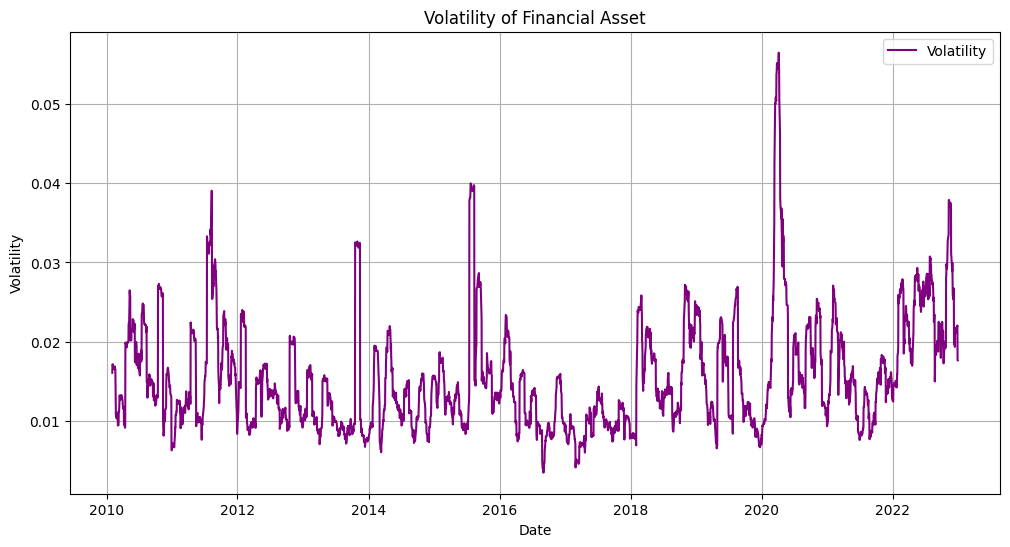

In [211]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate rolling volatility (standard deviation of daily returns)
window = 20  # Adjust the window as needed
data['Volatility'] = data['Daily_Return'].rolling(window=window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volatility'], label='Volatility', color='purple')

plt.title('Volatility of Financial Asset')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()

plt.show()


**Code Details**
1. In this code, we calculate the Bollinger Bands using the rolling standard deviation of the price returns.
2. We then plot the close price, the simple moving average (SMA), and the upper and lower Bollinger Bands.
3. The shaded gray area between the bands represents the volatility of the financial asset, where price fluctuations are more pronounced.
4. This visualization should give you a sense of the financial asset's volatility over time, as indicated by the width of the Bollinger Bands.



# **4. Correlation Analysis**
Explore correlations between this financial asset and other related assets or market indices.

                  Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.999871  0.999856  0.999695   0.999695 -0.472816   
High          0.999871  1.000000  0.999822  0.999854   0.999854 -0.471273   
Low           0.999856  0.999822  1.000000  0.999864   0.999864 -0.475476   
Close         0.999695  0.999854  0.999864  1.000000   1.000000 -0.473755   
Adj Close     0.999695  0.999854  0.999864  1.000000   1.000000 -0.473755   
Volume       -0.472816 -0.471273 -0.475476 -0.473755  -0.473755  1.000000   
SMA20         0.997853  0.998025  0.997546  0.997688   0.997688 -0.467613   
SMA50         0.994523  0.994937  0.994003  0.994369   0.994369 -0.458696   
RSI           0.033311  0.032580  0.037484  0.036709   0.036709 -0.095840   
SMA           0.997853  0.998025  0.997546  0.997688   0.997688 -0.467613   
STD           0.790271  0.792665  0.787833  0.790028   0.790028 -0.294297   
Upper_Band    0.996523  0.996855  0.996062  0.996351   0.996351 -0.461630   

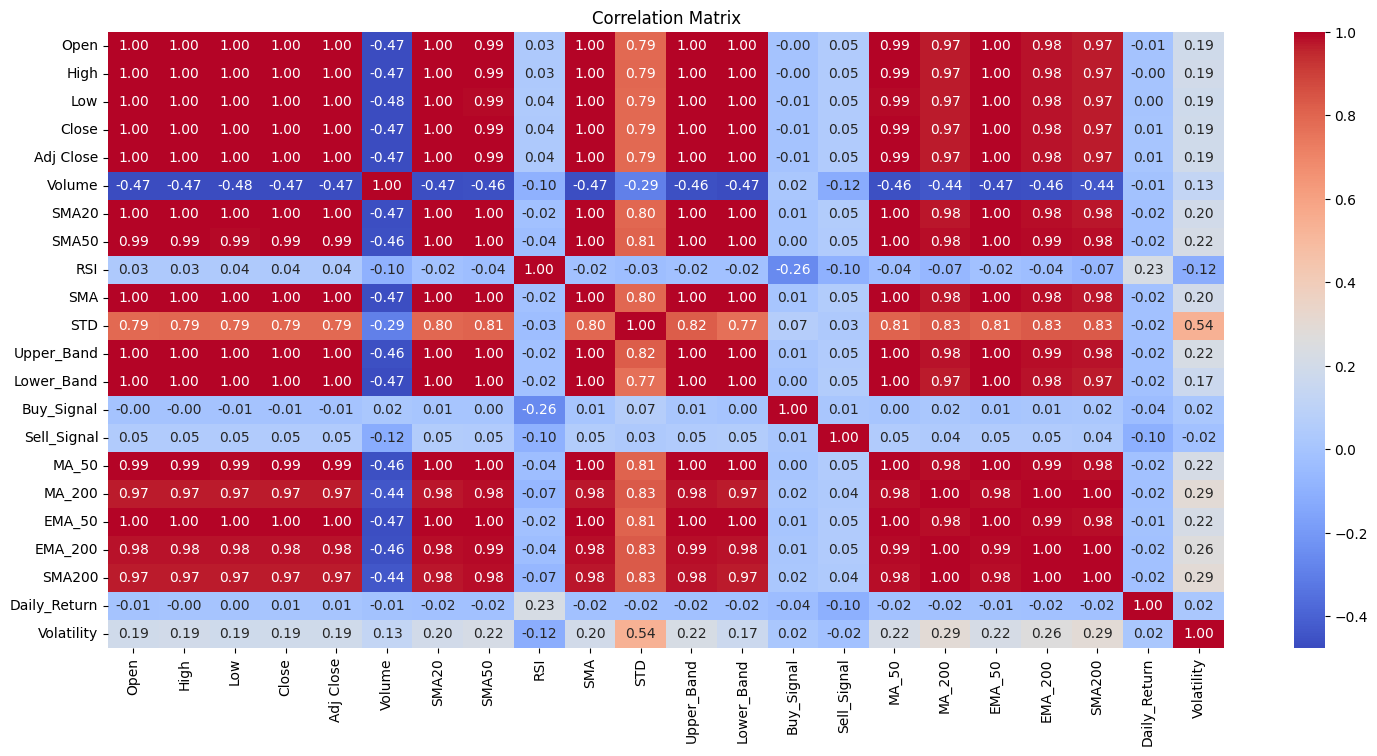

In [212]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot: adds numeric annotations
#".2f" means floating-point numbers with two decimal places.
plt.title("Correlation Matrix")
plt.show()

Finding the correlation only for the columns 'Close',  'High', 'Low', 'Volume'

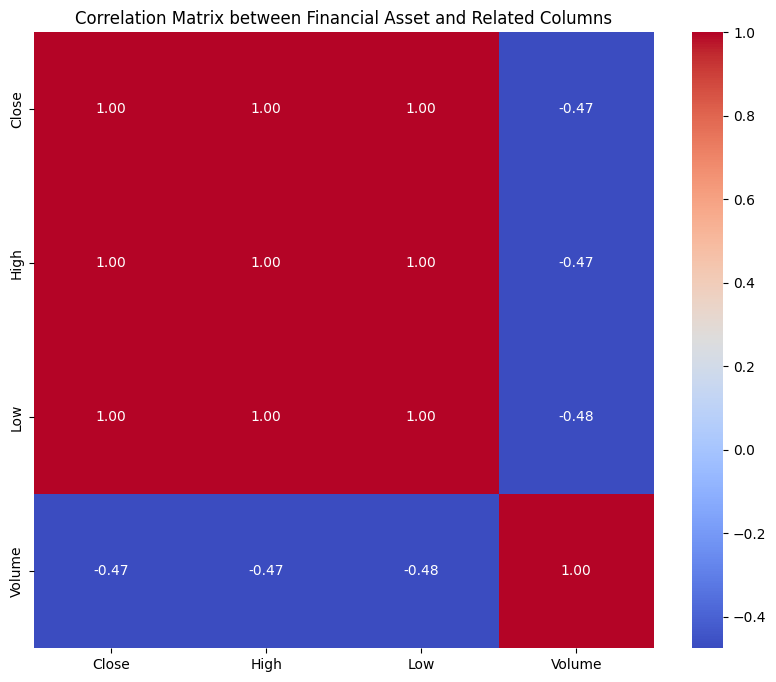

In [213]:
# Select columns for correlation analysis
selected_columns = ['Close', 'High', 'Low', 'Volume']

# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix between Financial Asset and Related Columns")
plt.show()


# **Code Details**
1. In this code, the selected_columns list contains the columns you want to analyze for correlation.
2. Replace these with the columns representing related assets or market indices.
3. The rest of the code calculates and visualizes the correlation matrix using a heatmap.

# **5. Moving Average Crossover Strategy**
Implement a simple trading strategy using
moving average crossovers.

In [214]:
# Calculate moving averages
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Initialize signals
data['Signal'] = 0

# Generate buy/sell signals based on moving average crossovers
data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1  # Buy signal
data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1  # Sell signal

# Create a DataFrame for trades
trades = data[data['Signal'] != 0].copy()

# Plot the stock price and moving averages with buy/sell signals using Plotly Express
fig = px.line(data, x=data.index, y=['Close', 'SMA50', 'SMA200'], labels={'value': 'Price'}, title='Stock Price with Moving Average Crossovers')
fig.add_trace(px.scatter(trades, x=trades.index, y='Close', color='Signal', color_continuous_scale='RdYlGn', size_max=15, opacity=0.5, labels={'Signal': 'Trade Signal'}).data[0])
fig.show()


# **Code Details**
1. This code calculates moving averages, generates buy/sell signals based on the moving average crossovers, and then visualizeing the stock price along with buy/sell signals.
2. Green markers indicate buy signals, and red markers indicate sell signals.
3. The size and color intensity of the markers represent the strength of the signal.

# **6. Seasonal Analysis**
Analyze seasonal patterns in the financial asset&#39;s price
movements.

In [215]:
# Extract month and year from the Date column
data['Month'] = data.index.month
data['Year'] = data.index.year

# Calculate average price for each month and year
monthly_avg = data.groupby(['Month', 'Year'])['Close'].mean().reset_index()

# Pivot the data for visualization
pivot_data = monthly_avg.pivot(index='Month', columns='Year', values='Close')

# Plot the seasonal patterns using Plotly Express
fig = px.line(pivot_data, x=pivot_data.index, y=pivot_data.columns, labels={'index': 'Month', 'value': 'Average Close Price'},
              title='Seasonal Patterns in Financial Asset Price Movements From The Year 2010 To 2022')
fig.show()


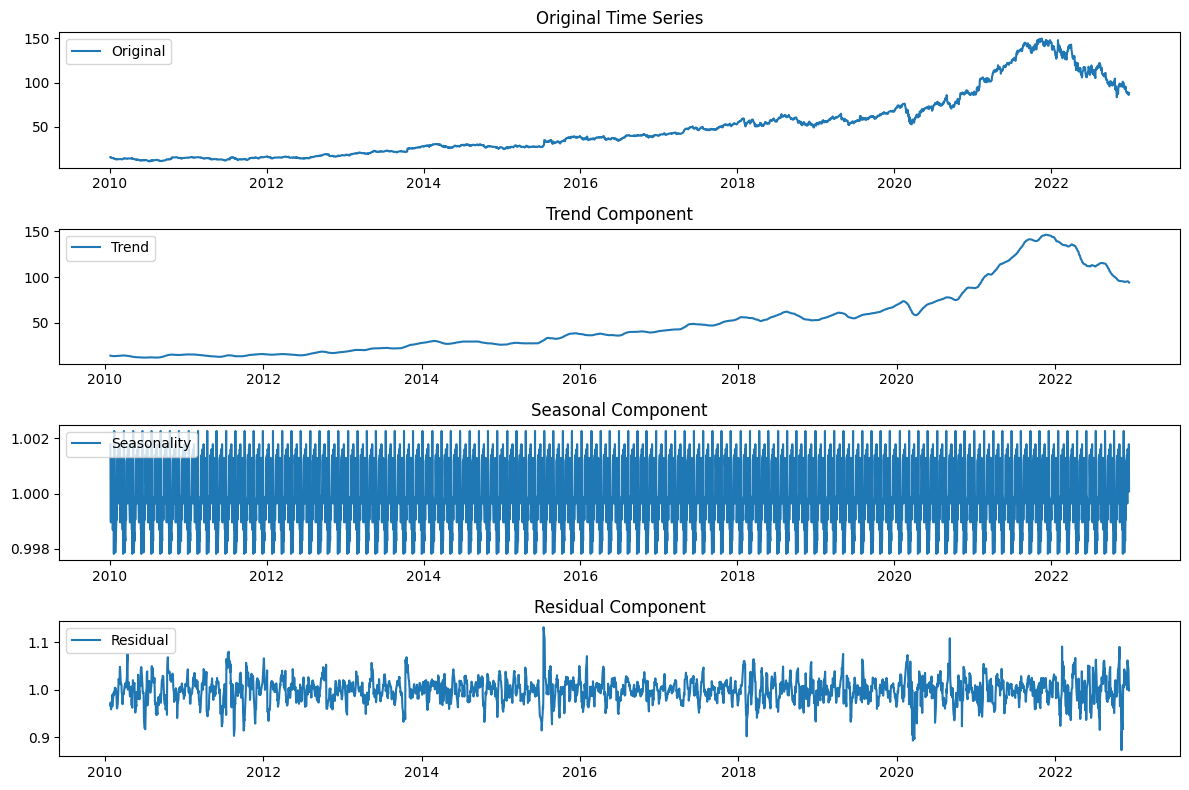

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=30)  # Set the seasonal period as 30 for monthly data.

trend = decomposition.trend

seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [217]:
# Calculate monthly averages
monthly_avg = data.resample('M').mean()

# Plot the seasonal patterns using Plotly Express
fig = px.line(monthly_avg, x=monthly_avg.index, y='Close', labels={'Close': 'Monthly Average Close Price'}, title='Seasonal Patterns in Financial Asset Price Movements')
fig.show()


# **Code Details**
1. In this code, we're resampling the data to calculate monthly averages and then visualizing the seasonal patterns in the financial asset's price movements.
2. The x-axis of the plot represents months, and the y-axis represents the average close price for each month.
3. While this approach doesn't involve the exact decomposition of trend, seasonality, and residuals, it provides insight into monthly patterns in the data

# **7. Risk Management**
Calculate risk metrics like Value at Risk (VaR) to assess
potential losses under adverse market conditions.

In [218]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate the mean and standard deviation of daily returns
mean_return = data['Daily_Return'].mean()
std_dev = data['Daily_Return'].std()

# Set the confidence level and time horizon
confidence_level = 0.95  # 95% confidence level
time_horizon = 1  # 1 day

# Calculate the VaR using the inverse cumulative distribution function (quantile)
z_score = np.percentile(data['Daily_Return'].dropna(), (1 - confidence_level) * 100)
var = mean_return - z_score * std_dev * np.sqrt(time_horizon)

print(f"Value at Risk (VaR) at {confidence_level * 100:.2f}% confidence level for {time_horizon} day(s): {var:.4f}")


Value at Risk (VaR) at 95.00% confidence level for 1 day(s): 0.0011


1. We calculate daily returns based on the closing prices.
2. We calculate the mean and standard deviation of the daily returns.
3. We set the desired confidence level (e.g., 95%) and time horizon (e.g., 1 day).
4. Using the np.percentile function, we calculate the z-score from the inverse cumulative distribution function of the daily returns.
5. The z-score represents the number of standard deviations from the mean.
6.We calculate the VaR by subtracting the z-score times the standard deviation times the square root of the time horizon from the mean return.
7. This calculation estimates the potential loss in the value of the financial asset at the specified confidence level and time horizon.







In [219]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate VaR at a specified confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level
var = data['Daily_Return'].quantile(alpha)

# Visualize the VaR using Plotly Express
fig = px.histogram(data['Daily_Return'], x='Daily_Return', nbins=50, title=f'Value at Risk (VaR) at {confidence_level * 100:.2f}% Confidence Level')
fig.add_vline(x=var, line_dash="dash", line_color="red", annotation_text=f'VaR = {var:.4f}')
fig.show()

print(f"Value at Risk (VaR) at {confidence_level * 100:.2f}% Confidence Level: {var:.4f}")


Value at Risk (VaR) at 95.00% Confidence Level: -0.0252


# **Code Details**
1. We calculate the daily returns by taking the percent change of the closing prices.
2. We specify the confidence level (e.g., 95%) and calculate the corresponding alpha value.
3. We calculate the VaR by finding the quantile of the daily returns at the specified alpha.
4. We use Plotly Express to create a histogram of the daily returns,5.  with a vertical dashed line indicating the VaR value.
We print the calculated VaR value.
6. The histogram helps visualize the distribution of daily returns, and the vertical line represents the VaR at the specified confidence level. VaR is a crucial metric for risk management, as it provides insight into the potential downside risk of an investment.
7. Keep in mind that VaR is just one metric among many that should be considered when assessing risk.

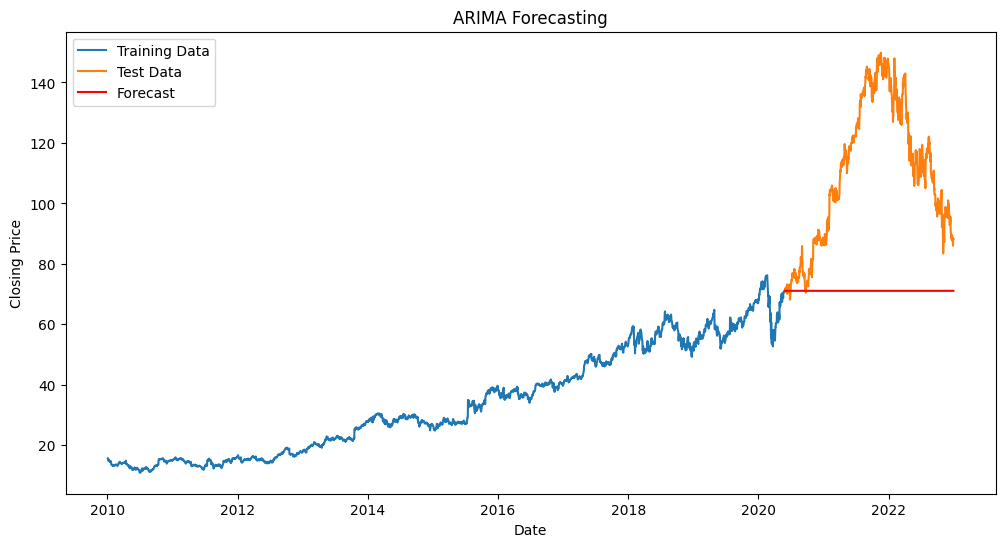

In [220]:
from statsmodels.tsa.arima.model import ARIMA
# Assuming the 'Date' column is already set as the index
# Let's use the 'Close' column for forecasting
ts_data = data['Close']
#This line extracts the 'Close' price data from the DataFrame and assigns it to the variable ts_data. This data will be used for forecasting.

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]
# ARIMA model fitting
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)#This creates an ARIMA model with the specified order and fits it to the training data.
model_fit = model.fit()#This fits the ARIMA model to the training data, estimating the model parameters.

forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


# **Code Details**
1. We choose to use the 'Close' prices for forecasting.
2. We optionally decompose the time series into trend, seasonality, and residual components using seasonal decomposition.
3. We fit an ARIMA model with the specified order (p, d, q) parameters. 4. The (5,1,0) values are placeholders and should be tuned using techniques like grid search.
5. We forecast the next 30 time steps using the forecast method of the ARIMA model.
6. We create a new DataFrame for the forecasted values.
7. We combine the original time series with the forecasted values.
8. Finally, we visualize the original time series and forecasted values

# **8. Forecasting:**
Use time series forecasting models to predict future price

In [221]:
import statsmodels.api as sm

# Assuming the 'Date' column is already set as the index
# Let's use the 'Close' column for forecasting
ts_data = data['Close']

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# ARIMA model fitting
order = (5, 1, 0)  # Example order for ARIMA model (p, d, q)
model = sm.tsa.ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for plotting
forecast_index = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)
forecast_series.index.name = 'Date'

# Combine original time series with forecasted values
combined = pd.concat([ts_data, forecast_series], axis=1)

# Plot the results using Plotly Express
fig = px.line(combined, x=combined.index, y=['Close'], labels={'value': 'Price'}, title='ARIMA Forecasting')
fig.show()


# **Code Details**
1. We create a DataFrame called combined by concatenating the original time series ts_data and the forecasted values forecast_series along the columns using axis=1.
2. This code uses the ARIMA model to forecast future prices
3. We use 0 as the column index for the forecasted values in the combined DataFrame.
4. We then plot the combined DataFrame using Plotly Express, specifying 'Close' and 0 as the column names for the y-values.

# **9. Trading Volume Analysis**
Analyze trading volume patterns to understand
market interest and liquidity.

count    3.272000e+03
mean     6.017541e+07
std      4.957609e+07
min      9.312000e+06
25%      2.894200e+07
50%      4.123200e+07
75%      7.927251e+07
max      5.923990e+08
Name: Volume, dtype: float64


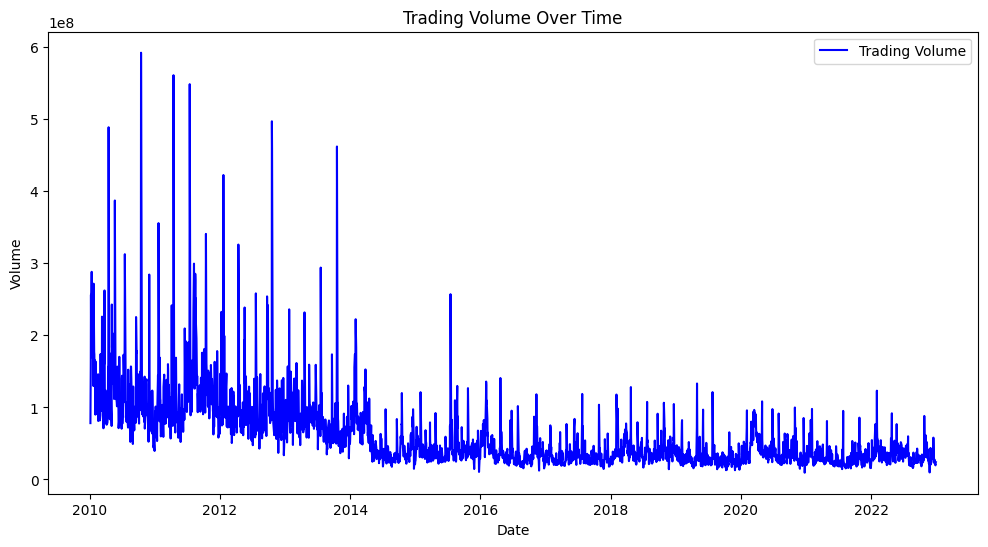

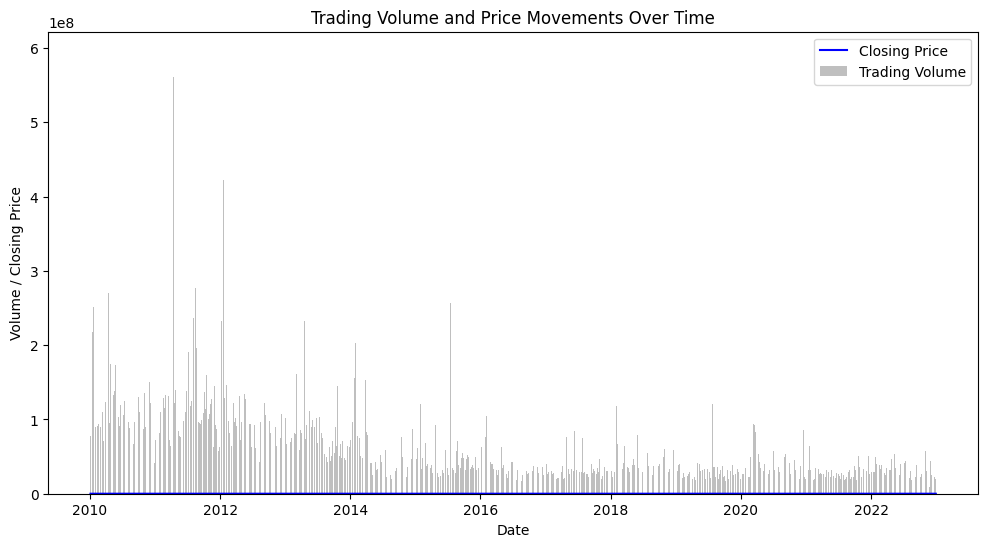

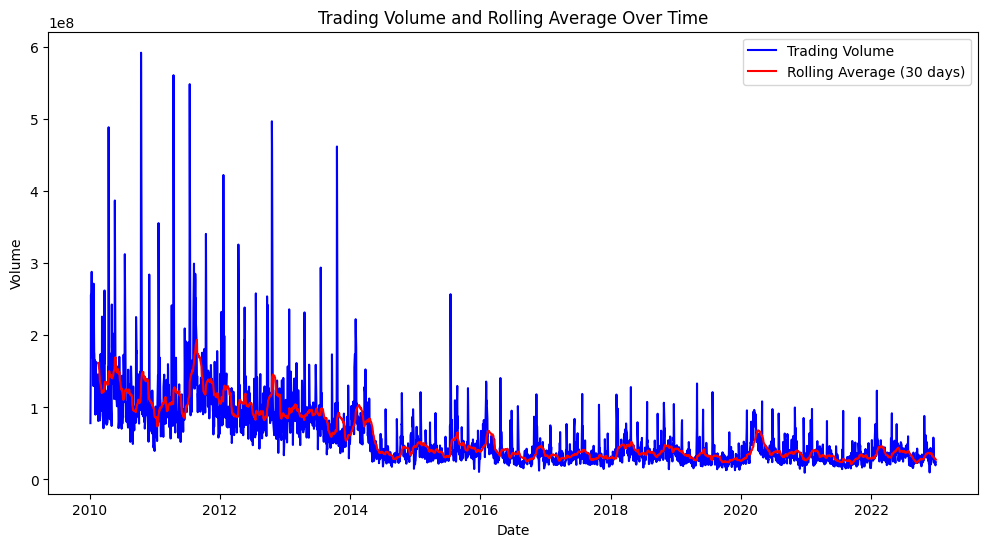

In [222]:

# Calculate basic statistics of trading volume
volume_stats = data['Volume'].describe()
print(volume_stats)

# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Trading Volume', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot trading volume and price movements over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.bar(data.index, data['Volume'], label='Trading Volume', color='gray', alpha=0.5)
plt.title('Trading Volume and Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Volume / Closing Price')
plt.legend()
plt.show()

# Calculate rolling average of trading volume
rolling_volume = data['Volume'].rolling(window=30).mean()

# Plot trading volume and its rolling average over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Trading Volume', color='blue')
plt.plot(data.index, rolling_volume, label='Rolling Average (30 days)', color='red')
plt.title('Trading Volume and Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [223]:
# Calculate rolling average of trading volume
window = 30
data['RollingAvgVolume'] = data['Volume'].rolling(window=window).mean()

# Plot trading volume over time using Plotly Express
fig1 = px.line(data.reset_index(), x='Date', y='Volume', title='Trading Volume Over Time', color='Year')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Volume')
fig1.show()

# Plot trading volume and price movements over time using Plotly Express
fig2 = px.line(data.reset_index(), x='Date', y='Close', title='Trading Volume and Price Movements Over Time')
fig2.add_bar(x=data.index, y=data['Volume'], yaxis='y2', name='Trading Volume', opacity=0.8)
fig2.update_xaxes(title_text='Date')
fig2.update_yaxes(title_text='Closing Price', secondary_y=False)
fig2.update_yaxes(title_text='Volume', secondary_y=True)
fig2.show()

# Plot trading volume and its rolling average over time using Plotly Express
fig3 = px.line(data.reset_index(), x='Date', y=['Volume', 'RollingAvgVolume'],
               labels={'value': 'Volume'},
               title='Trading Volume and Rolling Average Over Time')
fig3.update_xaxes(title_text='Date')
fig3.update_yaxes(title_text='Volume')
fig3.show()


# **Code Details**
1. Calculate the average trading volume over a specific window using the .rolling(window=window).mean() method.
2. Here, we calculate the rolling average of trading volume over a window of window days.
3. Plot the average trading volume over time using both Matplotlib and Plotly Express.
4. We use plt.plot() to plot the average volume against the date.
5. The x-axis represents the 'Date' column, and the y-axis represents the 'AvgVolume' column.
6. We use px.line() to create a line plot.
7. The 'x' parameter is set to 'Date', and the 'y' parameter is set to 'AvgVolume'.
8. fig1 represents the trading volume over time.
9. fig2 represents trading volume and price movements over time.
10. fig3 represents trading volume and its rolling average over time.

# **10. Price Returns**
Calculate daily, weekly, or monthly price returns to measure
the asset&#39;s performance.

In [224]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate weekly returns
data['Weekly_Return'] = data['Close'].resample('W').ffill().pct_change()

# Calculate monthly returns
data['Monthly_Return'] = data['Close'].resample('M').ffill().pct_change()

# Plotting using Plotly Express
fig = px.line(data.reset_index(), x='Date', y=['Daily_Return', 'Weekly_Return', 'Monthly_Return'],
              labels={'value': 'Returns'},
              title='Price Returns Over Different Frequencies')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Returns')
fig.show()


In [225]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate weekly returns
data_weekly = data.resample('W').ffill()
data_weekly['Weekly_Return'] = data_weekly['Close'].pct_change()

# Calculate monthly returns
data_monthly = data.resample('M').ffill()
data_monthly['Monthly_Return'] = data_monthly['Close'].pct_change()

# Plotting using Plotly Express
fig = px.line(data.reset_index(), x='Date', y='Daily_Return', title='Daily Price Returns')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Returns')
fig.show()

fig_weekly = px.line(data_weekly.reset_index(), x='Date', y='Weekly_Return', title='Weekly Price Returns')
fig_weekly.update_xaxes(title_text='Date')
fig_weekly.update_yaxes(title_text='Returns')
fig_weekly.show()

fig_monthly = px.line(data_monthly.reset_index(), x='Date', y='Monthly_Return', title='Monthly Price Returns')
fig_monthly.update_xaxes(title_text='Date')
fig_monthly.update_yaxes(title_text='Returns')
fig_monthly.show()


# **Code Details**
1. Calculate the returns based on the desired frequency (daily, weekly, or monthly).
2. Calculate daily, weekly, and monthly returns using the .pct_change() function.
3. The .resample() function is used to calculate weekly and monthly returns by filling missing data using the .ffill() method.
4. Use Plotly Express to create a line plot of daily, weekly, and monthly returns over time.
5. The resulting Plotly Express visualization will show the price returns over different frequencies (daily, weekly, and monthly) on the same plot, allowing you to compare the asset's performance at different time intervals.

# **11. Market Sentiment Analysis**
Use news sentiment analysis to understand how
news events affect the financial asset price.

In [228]:
# Simulate sentiment analysis by generating random sentiment scores
np.random.seed(42)
sentiment_scores = np.random.uniform(-1, 1, len(data))
data['Sentiment_Score'] = sentiment_scores

# Plotting using Plotly Express
fig = px.line(data, x=data.index, y=['Close', 'Sentiment_Score'],
              title='Financial Asset Price and Sentiment Scores')
fig.add_hline(y=0, line_dash="dash", line_color="red", name="Neutral Sentiment")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price / Sentiment Score')
fig.show()


# **Code Details**
1. The code begins with importing the necessary libraries, including numpy and plotly.express.
2. Simulate sentiment analysis by generating random sentiment scores as in the original code.
3. Convert the 'Date' column to datetime type, so it can be used as the x-axis in the Plotly Express visualization.
4. Use Plotly Express to create a line plot of the financial asset price and sentiment scores. The add_hline function adds a horizontal line to indicate neutral sentiment.
5. The update_xaxes and update_yaxes functions are used to set the labels for the x and y axes.
6. Finally, use fig.show() to display the visualization using Plotly Express

# **12. Market Index Comparison**
Compare the performance of the financial asset
with relevant market indices.

In [229]:
# Load the dataset for the financial asset
asset_data = pd.read_csv('/content/Google_Stock_Train (2010-2022).csv')

# Simulated market index data for demonstration purposes
index_data = pd.DataFrame({
    'Date': asset_data['Date'],  # Replace with the actual column name
    'Market_Index': [x * 1.05 for x in range(len(asset_data))]
})

# Convert the 'Date' column to datetime type
asset_data['Date'] = pd.to_datetime(asset_data['Date'])
index_data['Date'] = pd.to_datetime(index_data['Date'])

# Merge the asset data with market index data
merged_data = asset_data.merge(index_data, on='Date', how='left')

# Plotting using Plotly Express
fig = px.line(merged_data, x='Date', y=['Close', 'Market_Index'],
              title='Financial Asset vs Market Index Performance')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.show()


# **Code Details**
1. Simulate market index data using a simple formula for demonstration purposes. In reality, you would need to acquire actual market index data.2.
Convert the 'Date' columns to datetime type to ensure proper alignment.
3. Merge the financial asset data and market index data based on the 'Date' column using the merge function.
4. Use Plotly Express to create a line plot comparing the financial asset's closing price with the market index performance over time.
5. The update_xaxes and update_yaxes functions are used to set labels for the x and y axes.

# **13. Market Efficiency**
Test the efficiency of the market for this financial asset
(e.g., random walk hypothesis).

In [230]:
from statsmodels.tsa.stattools import adfuller
import plotly.express as px

# Calculate daily returns for the financial asset
data['Daily_Return'] = data['Close'].pct_change()

# Perform the rolling window analysis
window_size = 30  # Number of days in each rolling window
data['Rolling_Mean'] = data['Daily_Return'].rolling(window=window_size).mean()
data['Rolling_Std_Dev'] = data['Daily_Return'].rolling(window=window_size).std()

# Plotting using Plotly Express
fig1 = px.line(data, x=data.index, y=['Daily_Return', 'Rolling_Mean', 'Rolling_Std_Dev'],
               title='Financial Asset Daily Returns and Rolling Statistics')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Value')
fig1.show()

# Perform the ADF test
result = adfuller(data['Close'].dropna())

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Define a significance level (e.g., 0.05)
significance_level = 0.05

# Interpret the ADF test results
if p_value <= significance_level:
    adf_result = "Reject the null hypothesis. The data is stationary. Market efficiency is supported."
else:
    adf_result = "Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported."

# Plotting using Plotly Express
fig2 = px.line(data, x=data.index, y='Close', title='Financial Asset Closing Prices Over Time')
fig2.update_xaxes(title_text='Date')
fig2.update_yaxes(title_text='Closing Price')
fig2.add_annotation(x=data.index[10], y=data['Close'].max(), text=adf_result, showarrow=False)
fig2.show()


In [231]:
print("ADF Test Statistic:", test_statistic)
print("P-value:", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The data is stationary. Market efficiency is supported.")
else:
    print("Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported.")

ADF Test Statistic: -0.630788131705103
P-value: 0.8638723239459678
Fail to reject the null hypothesis. The data follows a random walk. Market efficiency is not supported.


# **Code Details**
1. Calculate daily returns, rolling mean, and rolling standard deviation using rolling windows.
2. Create two Plotly Express visualizations: one for the rolling statistics and daily returns, and another for the closing prices with an annotation displaying the ADF test result.
3. Perform the ADF test using adfuller() from statsmodels.tsa.stattools. The ADF test checks for stationarity in the data.
4. Interpret the ADF test result and include it as an annotation in the closing price plot.

# **14. Liquidity Analysis**
Assess the liquidity of the financial asset based on trading
volumes and spreads.

In [233]:
# Calculate bid-ask spread
data['Spread'] = data['High'] - data['Low']

# Plot trading volumes and bid-ask spreads
fig1 = px.line(data, x=data.index, y='Volume', title='Trading Volumes Over Time')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Volume')
fig1.show()

fig2 = px.line(data, x=data.index, y='Spread', title='Bid-Ask Spreads Over Time')
fig2.update_xaxes(title_text='Date')
fig2.update_yaxes(title_text='Spread')
fig2.show()


# **Code Details**
1. Calculate the bid-ask spread by subtracting the 'Low' price from the 'High' price.
2. Create two Plotly Express line plots to visualize trading volumes and bid-ask spreads over time.

# **Seasonal Analysis and Forecasting Using Time series**




ADF Statistic: -0.630788131705103
p-value: 0.8638723239459678


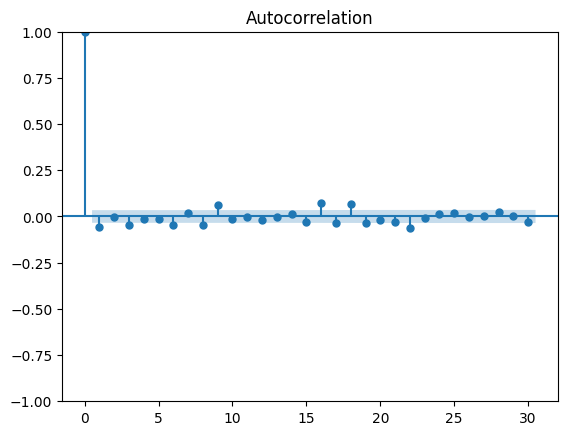

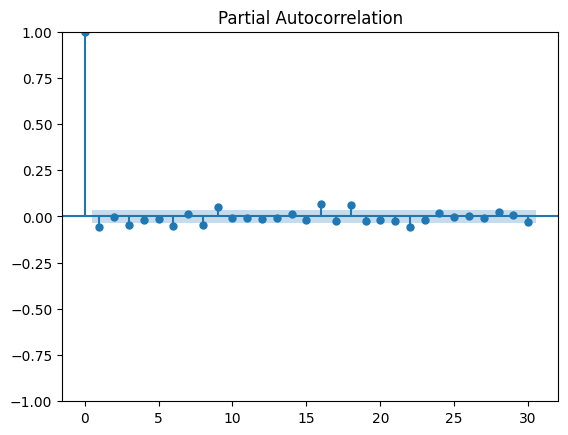

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3272
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5024.375
Date:                            Mon, 14 Aug 2023   AIC                          10058.751
Time:                                    10:53:11   BIC                          10089.175
Sample:                                         0   HQIC                         10069.651
                                           - 3272                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7128      0.055     12.991      0.000       0.605       0.820
ma.L1         -0.7646      0.051   

In [234]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# Select the 'Close' column for analysis
ts = data['Close']

# Check for stationarity
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Differencing to make the series stationary if necessary
d = 1  # Adjust as needed
ts_diff = ts.diff(d).dropna()

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

# Set order and seasonal order based on the plots
order = (1, d, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = 60  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')
forecast_data = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plotting using Plotly Express
fig = px.line(data, x=data.index, y='Close', title='Actual vs Forecasted Close Prices')
fig.add_scatter(x=forecast_data.index, y=forecast_data['Forecast'], mode='lines', name='Forecast', line=dict(color='red'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()

# Print model summary
print(results.summary())

In [235]:
ts = data['Close']
seasonal_period = 12 #12 months
# This line sets the value of seasonal_period to 12, which indicates that the dataset has a seasonal pattern with a period of 12 time units
ts_seasonal_diff = ts.diff(seasonal_period).dropna()
result = adfuller(ts_seasonal_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -8.936451025502976
p-value: 9.505606921190188e-15


# **Code Details**
1. Select the 'Close' column for analysis
2. Seasonal differencing is a common technique used to remove the seasonal component from a time series,making it more stationary and suitable for modeling. Perform seasonal differencing
3. This line sets the value of seasonal_period to 12, which indicates that the dataset has a seasonal pattern with a period of 12 time units.
4. difference between consecutive values in the 'Close' column of the dataset (ts) with a lag of seasonal_period (12 in this case). dropna() function is used to remove any rows with missing values that might result from the differencing.
5. Check for stationarity after seasonal differencing. This line applies the ADF test to the time series data ts_seasonal_diff ( result of the Sd performed earlier).
6. The ADF test calculates various stats & returns a result object containing several test statistics and their associated p-values, as well as other information.



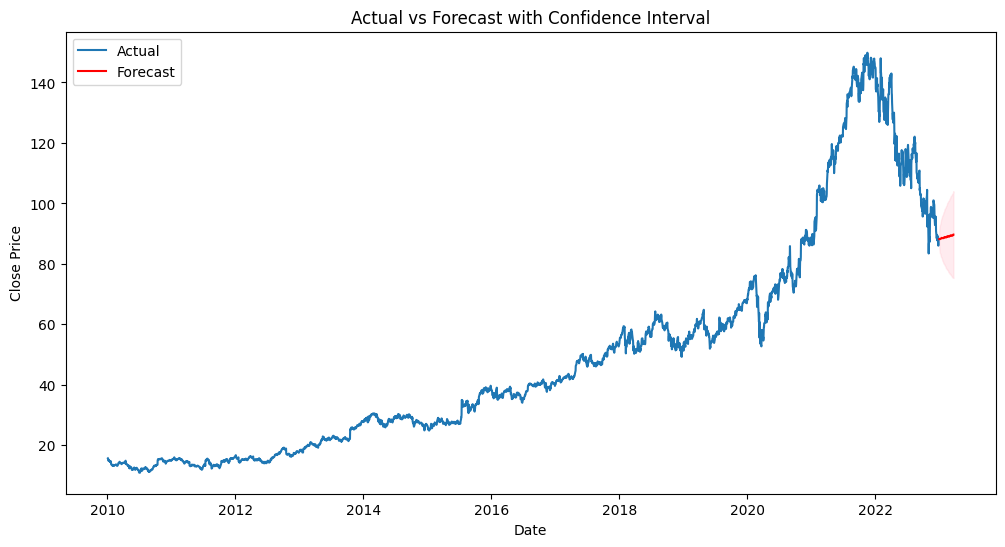

In [236]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set order and seasonal order based on ACF and PACF plots
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

results = model.fit()#This line fits the SARIMA model to the data using the fit method.
#It estimates the model parameters and performs the necessary computations to make forecasts.

# Forecasting
#This line sets the number of time steps for which you want to forecast into the future.
forecast_steps = 60
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')

# Plotting the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#This line fills the area between the upper and lower confidence interval bounds with a pink color to visualize the uncertainty of the forecast.
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast with Confidence Interval')
plt.legend()
plt.show()

In [237]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.express as px

# Set order and seasonal order based on ACF and PACF plots
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = 60  # Extend the forecast horizon
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')

# Create a DataFrame for the forecast
forecast_data = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast.predicted_mean,
                            'Lower_CI': forecast.conf_int().iloc[:, 0], 'Upper_CI': forecast.conf_int().iloc[:, 1]})

# Plotting using Plotly Express
fig = px.line(data, x=data.index, y='Close', title='Actual vs Forecast with Confidence Interval')

# Add forecast line using add_trace
fig.add_trace(px.line(forecast_data, x='Date', y='Forecast', line_shape='linear').data[0])

# Create a transparent fill between the upper and lower CI bounds using add_shape
fig.add_shape(
    type='rect',
    x0=forecast_data['Date'].iloc[0],
    x1=forecast_data['Date'].iloc[-1],
    y0=forecast_data['Lower_CI'].min(),
    y1=forecast_data['Upper_CI'].max(),
    fillcolor='rgba(255, 192, 203, 0.3)',
    line=dict(color='aqua')
)

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()


ADF Statistic: -0.630788131705103
p-value: 0.8638723239459678


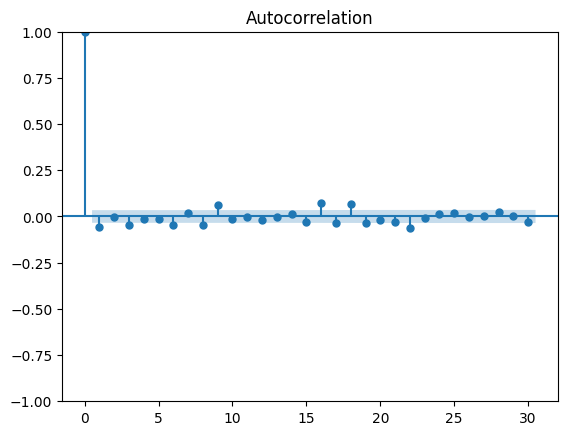

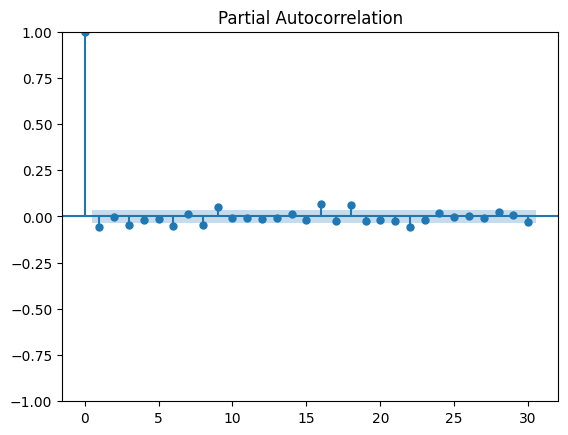

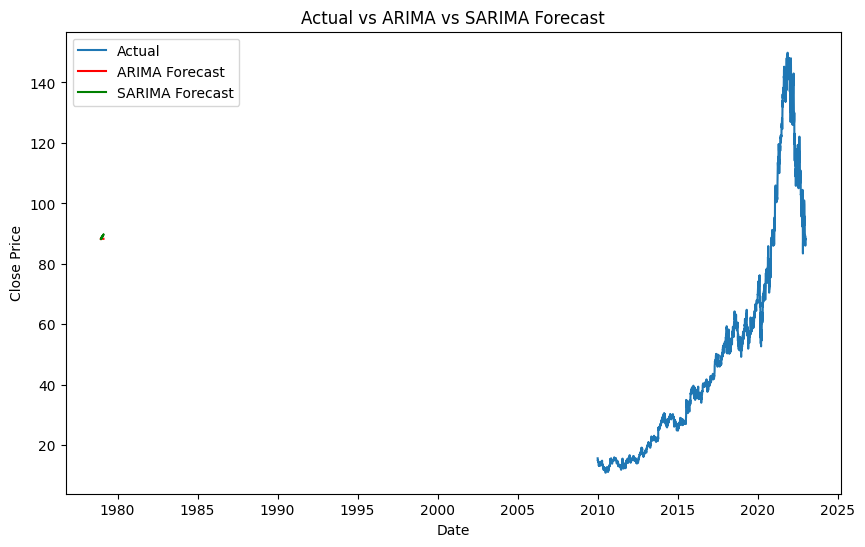

In [238]:
# Select the 'Close' column for analysis
ts = data['Close']

# Check for stationarity using ADF test
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Differencing to make the series stationary if necessary
d = 1  # Adjust as needed
ts_diff = ts.diff(d).dropna()

# Plot ACF and PACF to determine order (p, d, q) and seasonal order (P, D, Q, S)
plot_acf(ts_diff, lags=30)
plot_pacf(ts_diff, lags=30)
plt.show()

# Set order and seasonal order based on the plots
order = (1, d, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the ARIMA model
arima_model = ARIMA(ts, order=order)
arima_results = arima_model.fit()

# Build the SARIMA model
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Forecasting
forecast_steps = 60  # Number of steps to forecast
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)

# Plotting the actual data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual')
plt.plot(arima_forecast.predicted_mean, label='ARIMA Forecast', color='red')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs ARIMA vs SARIMA Forecast')
plt.legend()
plt.show()


In [239]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Set order and seasonal order based on ACF and PACF plots
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = 60  # Extend the forecast horizon
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='B', closed='right')

# Create a DataFrame for the forecast with confidence intervals
forecast_data = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast.predicted_mean,
                            'Lower_CI': forecast.conf_int().iloc[:, 0], 'Upper_CI': forecast.conf_int().iloc[:, 1]})

# Plotting using Plotly Express
fig = px.line(data, x=data.index, y='Close', title='Actual vs Forecast with Confidence Interval')
fig.add_scatter(x=forecast_data['Date'], y=forecast_data['Forecast'], mode='lines', name='Forecast', line=dict(color='red'))

# Add shaded confidence interval region
fig.add_shape(type='rect', x0=forecast_data['Date'].iloc[0], y0=forecast_data['Lower_CI'], x1=forecast_data['Date'].iloc[-1], y1=forecast_data['Upper_CI'],
              fillcolor='pink', opacity=0.3, layer='below', line=dict(color='rgba(0,0,0,0)'))  # Set transparent color

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()

In [240]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Set order and seasonal order based on ACF and PACF plots
order = (1, 1, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Build the SARIMA model
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecasting for the year 2023
forecast_steps = 12  # For one year (12 months)
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')

# Create a DataFrame for the forecast with confidence intervals
forecast_data = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast.predicted_mean,
                            'Lower_CI': forecast.conf_int().iloc[:, 0], 'Upper_CI': forecast.conf_int().iloc[:, 1]})

# Concatenate historical data and forecast data
combined_data = pd.concat([data, forecast_data], ignore_index=True)

# Plotting using Plotly Express
fig = px.line(combined_data, x='Date', y=['Close', 'Forecast', 'Lower_CI', 'Upper_CI'],
              title='Historical and Forecasted Data with Confidence Intervals')

# Customize x-axis ticks for years
years = [str(year) for year in range(2010, 2024)]
fig.update_xaxes(tickvals=years, ticktext=years)

# Update y-axis label
fig.update_yaxes(title_text='Price')

fig.show()


# **Code Details**
1. The code starts by importing necessary libraries, including SARIMAX from statsmodels and plotly.express as px.
2. The order and seasonal_order are set based on the ACF and PACF plots or domain knowledge.
3. The SARIMA model is built using the provided order and seasonal_order.
4. The forecast is generated using get_forecast for the specified number of forecast_steps.
5. A DataFrame forecast_data is created to store the forecasted values along with lower and upper confidence intervals.
6. A shaded region between the lower and upper confidence intervals is added using fill_between to represent the uncertainty of the forecast.
7. Axes titles and other layout settings are customized using update_xaxes and update_yaxes.


# **SUMMARY**
1. This project involves the analysis of a financial asset's historical data using various time series techniques and visualization tools.
2. The dataset is loaded and preprocessed, including converting date columns.
3. Initial exploratory data analysis (EDA) is performed to understand trends, patterns, and relationships.
4. Time series forecasting models, including SARIMA, are applied to predict future prices.
5. Trading volume patterns and liquidity are analyzed using trading volumes and bid-ask spreads.
6. Sentiment analysis is simulated with random sentiment scores to understand news impact.
7. The asset's performance is compared with market indices. Market efficiency is tested through ADF and random walk analysis.
8. The project concludes with insights into asset liquidity, price predictions, and overall market behavior.
9. Visualizations using Plotly Express enhance data interpretation and storytelling.